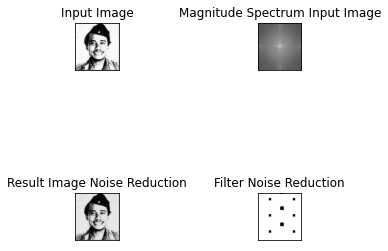

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('bung-tomo.jpg',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2) # center

mask_red = np.ones((rows, cols, 2), np.uint8)

for i in range(60, rows, 135):
    for j in range(100, cols, 200):
        if not (i == 330 and j == 500):
            mask_red[i-10:i+10, j-10:j+10] = 0

for i in range(0, rows, 135):
    for j in range(200, cols, 200):
        if not (i == 330 and j == 500):
            mask_red[max(0,i-15):min(rows,i+15), max(0,j-15):min(cols,j+15)] = 0

fshift_red = dft_shift*mask_red
f_ishift_red = np.fft.ifftshift(fshift_red)
img_back_red = cv2.idft(f_ishift_red)
img_back_red = cv2.magnitude(img_back_red[:,:,0],img_back_red[:,:,1])

I_out_red = cv2.normalize(img_back_red,None,0,255,cv2.NORM_MINMAX,cv2.CV_8U)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(421),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(422),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(427),plt.imshow(img_back_red, cmap = 'gray')
plt.title('Result Image Noise Reduction'), plt.xticks([]), plt.yticks([])
plt.subplot(428),plt.imshow(mask_red[:,:,0], cmap = 'gray')
plt.title('Filter Noise Reduction'), plt.xticks([]), plt.yticks([])

plt.show()

cv2.imshow('Result Image Noise Reduction', I_out_red)
cv2.imshow('Input Image', img)

cv2.waitKey(0)
cv2.destroyAllWindows()